In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, Ridge

In [ ]:
df= pd.read_csv('ToyotaCorolla - MLR.csv')

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df = df.drop(columns=['Fuel_Type'])
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025
1432,10845,72,19000,86,0,1300,3,4,5,1015
1433,8500,71,17016,86,0,1300,3,4,5,1015
1434,7250,70,16916,86,0,1300,3,4,5,1015


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

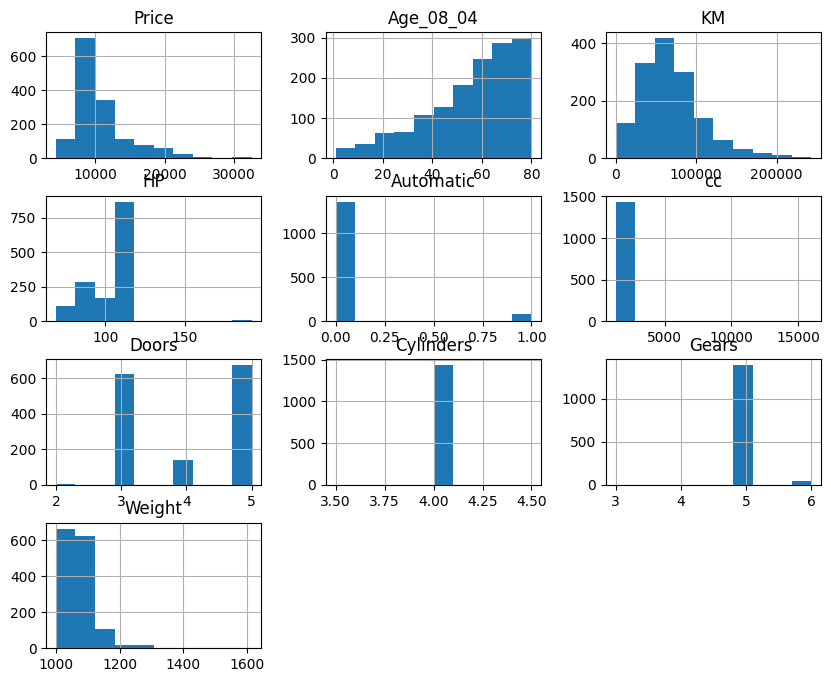

In [ ]:
df.hist(figsize=(10, 8))
plt.show()


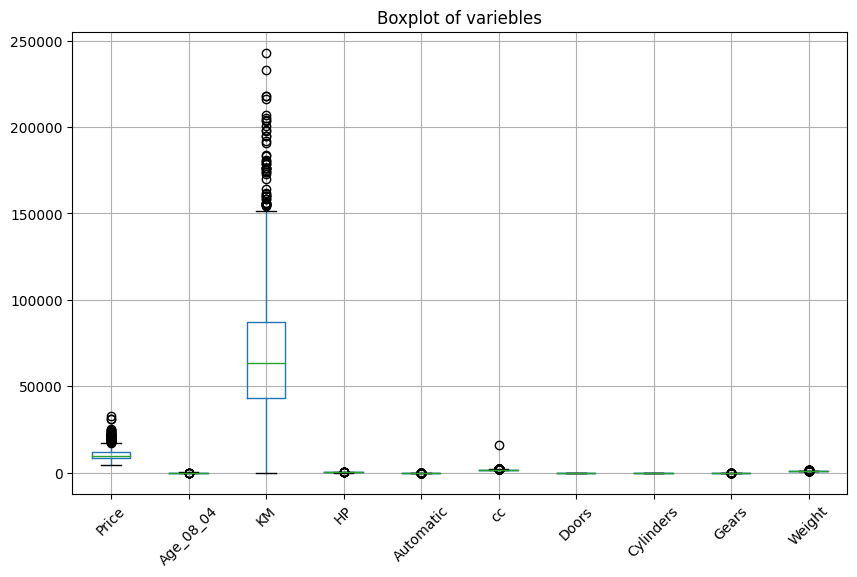

In [ ]:
df.boxplot(figsize=(10,6))
plt.title('Boxplot of variebles')
plt.xticks(rotation=45)
plt.show()

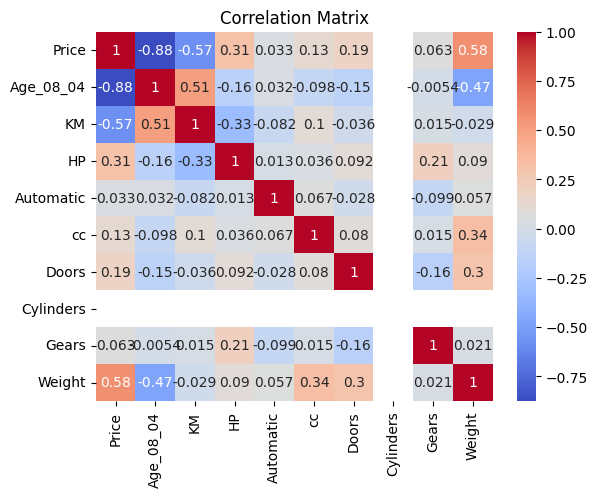

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 histograms, boxplots,  for numerical variables, correlation heatmap, for categorical variables.


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']


training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("Model 1 - Coefficients:")
print(pd.DataFrame({'Feature': X.columns, 'Coefficient': model1.coef_}))

Model 1 - Coefficients:
     Feature   Coefficient
0  Age_08_04 -1.207831e+02
1         KM -1.998627e-02
2         HP  2.742911e+01
3  Automatic  3.712087e+02
4         cc -1.135136e-01
5      Doors  7.535468e+00
6  Cylinders  3.183231e-12
7      Gears  6.264184e+02
8     Weight  1.984314e+01


In [ ]:
# Model 2: Using selected features
selected_features = ['HP','Automatic','cc']
X_train_selected = X_train[selected_features]
X_test_selected =X_test[selected_features]
model2= LinearRegression()
model2.fit(X_train_selected,y_train)
print("\nModel 2 - Coefficients:")
print(pd.DataFrame({'Feature': selected_features, 'Coefficient': model2.coef_}))


Model 2 - Coefficients:
     Feature  Coefficient
0         HP    73.167558
1  Automatic   307.556160
2         cc     0.886331


In [ ]:
# model 3:Using interaction terms
X_train_interact = X_train.copy()
X_test_interact = X_test.copy()
X_train_interact['Gears_Weight_interaction'] = X_train['Gears'] * X_train['Weight']
X_test_interact['Gears_Weight_interaction'] = X_test['Gears'] * X_test['Weight']
model3 = LinearRegression()
model3.fit(X_train_interact,y_train)
print("\nModel 3 - Coefficients:")
print(pd.DataFrame({'Feature': X_train_interact.columns, 'Coefficient': model3.coef_}))


Model 3 - Coefficients:
                    Feature   Coefficient
0                 Age_08_04 -1.205218e+02
1                        KM -2.018446e-02
2                        HP  2.547939e+01
3                 Automatic  3.911553e+02
4                        cc -1.088488e-01
5                     Doors  1.289192e+01
6                 Cylinders  3.410605e-13
7                     Gears -1.135350e+04
8                    Weight -3.570461e+01
9  Gears_Weight_interaction  1.107088e+01


In [ ]:
# Evaluation
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Model 1 - MSE:", mse1, " R^2:", r2_1)
print("Model 2 - MSE:", mse2, " R^2:", r2_2)
print("Model 3 - MSE:", mse3, " R^2:", r2_3)

Model 1 - MSE: 1970126.6288130241  R^2: 0.8523452141908858
Model 2 - MSE: 11506636.036656797  R^2: 0.13761386982540003
Model 3 - MSE: 1946177.5878322902  R^2: 0.8541401193835914


In [ ]:
lasso_reg = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso_reg.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Calculate MSE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)

Lasso Regression MSE: 1970167.5456595074


In [ ]:
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate MSE
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

Ridge Regression MSE: 1970379.6468550158


Lasso and Ridge regression add penalty terms to the standard linear regression objective function, which helps to prevent overfitting and can lead to better generalization performance, especially when dealing with high-dimensional datasets or datasets with multicollinearity among features. Adjusting the regularization strength (alpha) allows us to control the amount of regularization applied.

**Interview Questions:**

**1.What is Normalization & Standardization and how is it helpful?**

"Normalization and standardization are two common techniques used in data preprocessing in machine learning.

Normalization involves scaling numeric data to a specific range, usually between 0 and 1. This is typically done using the Min-Max scaling formula. Normalization ensures that all features have the same scale, preventing certain features from dominating others during training, especially in distance-based algorithms.

Standardization, on the other hand, centers the data around 0 and scales it to have a standard deviation of 1. It's achieved by subtracting the mean and dividing by the standard deviation of each feature. Standardization makes the data more interpretable and comparable across features. It also helps algorithms converge faster, particularly gradient-based optimization algorithms.

Both normalization and standardization are helpful in improving the performance and stability of machine learning algorithms. They ensure that features are on a consistent scale and have similar distributions, which aids in better model training and interpretation."







**2.What techniques can be used to address multicollinearity in multiple linear regression?**

Addressing multicollinearity in multiple linear regression is crucial to ensure the reliability of the model's coefficients and predictions. Here are some techniques commonly used to mitigate multicollinearity:

Feature Selection: Removing one or more highly correlated variables from the model can help alleviate multicollinearity. This can be done based on domain knowledge, statistical tests, or automated feature selection algorithms.

Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that transforms correlated variables into a set of linearly uncorrelated variables called principal components. By selecting a subset of these components that capture most of the variability in the data, multicollinearity can be reduced.

Ridge Regression: Ridge regression adds a penalty term to the ordinary least squares objective function, which shrinks the regression coefficients. This penalty term is proportional to the square of the magnitude of the coefficients, effectively reducing their variance and mitigating multicollinearity.

Lasso Regression: Similar to ridge regression, lasso regression adds a penalty term to the objective function. However, the penalty term in lasso regression is proportional to the absolute value of the coefficients, leading to sparsity in the coefficient estimates and potentially selecting a subset of features, thus reducing multicollinearity.

Variance Inflation Factor (VIF): VIF measures the extent of multicollinearity in a regression model. A high VIF value (> 10) indicates that multicollinearity may be present. Identifying variables with high VIF values and either removing them or addressing multicollinearity using other techniques can help improve the model's stability.

Partial Least Squares (PLS) Regression: PLS regression is a dimensionality reduction technique that identifies latent variables that explain the maximum variance in both the predictors and the response variable. By focusing on these latent variables, multicollinearity can be reduced while preserving predictive power.

These techniques can be used individually or in combination, depending on the specific characteristics of the dataset and the goals of the analysis. It's essential to assess the effectiveness of each technique and choose the most appropriate approach based on the context of the problem.





